In [2]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import nglview as nv

In [3]:
universe = mda.Universe("top.pdb", "A1SLCD.dcd")
print(universe)

<Universe with 131 atoms>


/home/sujaly/anaconda3/envs/MDAnalysis/lib/python3.13/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [4]:
# Check number of atoms, residues 

print(universe.atoms.residues)

<ResidueGroup [<Residue GLY, 1>, <Residue SER, 2>, <Residue MET, 3>, ..., <Residue ARG, 129>, <Residue ARG, 130>, <Residue PHE, 131>]>


In [7]:
protein = nv.show_mdanalysis(universe)
protein.add_representation("ball+stick", selection="protein")
protein

NGLWidget(max_frame=1009)

In [8]:
# center of mass

universe.atoms.center_of_mass()

array([245.11870884, 250.12827924, 249.86098008])

In [9]:
rgry = []
time = []

for ts in universe.trajectory:
    time.append(universe.trajectory.time)
    rgry.append(universe.atoms.radius_of_gyration())

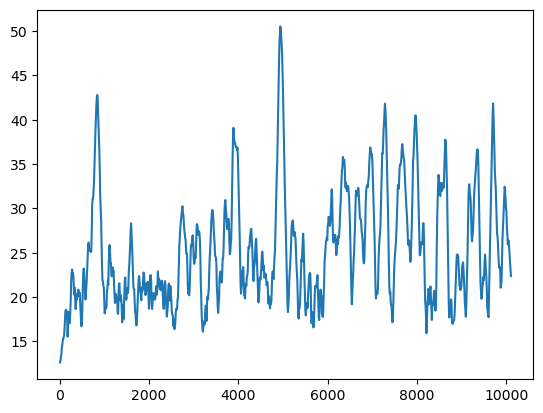

In [10]:
plt.plot(time, rgry)
plt.show()

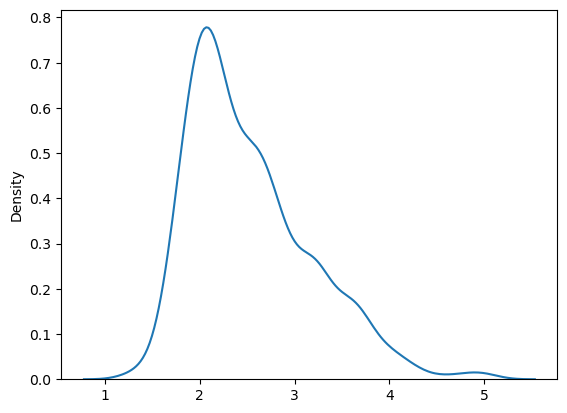

In [14]:
import seaborn as sns
import numpy as np

sns.kdeplot(np.array(rgry)/10)
plt.show()